In [1]:
# 必要ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#写経【1】
# irisデータのロード
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
#写経【２】
# データの詳細を出力
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
#写経【３】
# 含まれている特徴量を確認
# [がく片の長さ(cm), がく片の幅(cm), 花びらの長さ(cm), 花びらの幅(cm)]
columns = iris.feature_names
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#写経【４】
# 説明変数を確認
# [がくの長さ(cm), がくの幅(cm), 花びらの長さ(cm), 花びらの幅(cm)]
X = iris.data
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
#写経【５】
# 目的変数を確認
# 0: Setosa(50個)
# 1: Versicolour(50個)
# 2: Virginica(50個)
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#写経【６】
# DataFrame型へ変換
X_df = pd.DataFrame(X, columns=columns)
y_df = pd.DataFrame(y, columns=['speacies'])
df = pd.concat([X_df, y_df], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),speacies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#写経【７】
# 基本統計量を出力
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),speacies
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


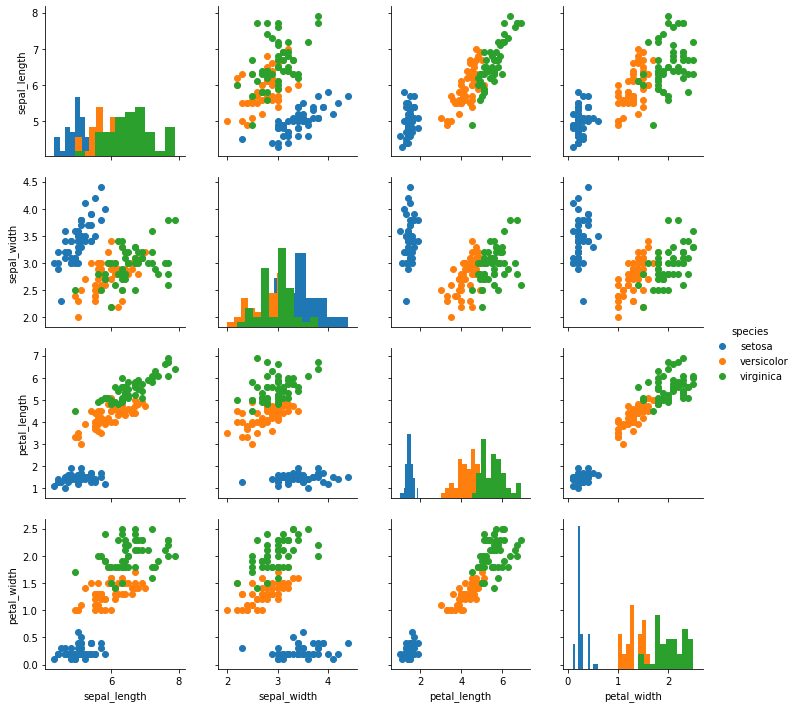

In [9]:
import seaborn as sns
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [10]:
#写経【9】
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [11]:
#写経【1０】
# 特徴選択
# setosaとversicolorの､petal lengthとpetal widthを選択
X_1 = X_std[0:100, [2, 3]]
y_1 = y[:100]

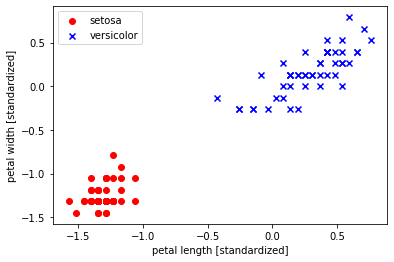

In [12]:
#写経【1１】
# 散布図を出力

# settosaのプロット
plt.scatter(X_std[:50, 2], X_std[:50,3], color="red", marker="o", label="setosa")
# versicolorのプロット
plt.scatter(X_std[50:100, 2], X_std[50:100, 3],color="blue", marker="x",label="versicolor")
# 横軸の表示を設定
plt.xlabel("petal length [standardized]")
# 縦軸の表示を設定
plt.ylabel("petal width [standardized]")
# 左上に凡例を表示
plt.legend(loc="upper left")
# グラフを表示
plt.show()

In [13]:
#写経【1２】
# データセットの分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [14]:
#写経【1３】
# パーセプトロンを用いて学習を行う
from sklearn.linear_model import Perceptron
ppn_1 = Perceptron(eta0=0.1) # 学習率 0.1
ppn_1.fit(X_1_train, y_1_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
# ２次元データの決定曲線をプロットする関数
# (X, y, 分類器)
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


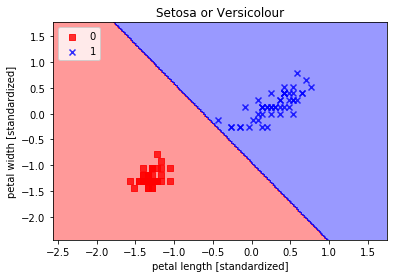

In [16]:
#写経【1４】
# 散布図上に決定曲線を出力
plot_decision_regions(X_1, y_1, ppn_1)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.title('Setosa or Versicolour')
plt.show()

In [17]:
#写経【1５】
# 正答率を出力
print('train acc: %.3f' % ppn_1.score(X_1_train, y_1_train))
print('test acc: %.3f' % ppn_1.score(X_1_test, y_1_test))

train acc: 1.000
test acc: 1.000


In [18]:
#写経【1６】
# testデータのindexを指定
# 0 <= index <= 29
index = 28

# 正解と予測のクラスラベルを出力
print('answer : %d' % y_1_test[index])
print('predict: %d' % ppn_1.predict(X_1_test[index].reshape(1, -1)))

answer : 1
predict: 1


In [19]:
#写経【1７】
# versinica含むすべてのサンプルを選択
# sepal lengthとpetal lengthを利用
X_2 = X_std[:,[2, 3]]
y_2 = y

In [20]:
#写経【1８】
# データの分割
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [21]:
#写経【1９】
# パーセプトロンの学習
from sklearn.linear_model import Perceptron
ppn_2 = Perceptron(eta0=0.1)
ppn_2.fit(X_2_train, y_2_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


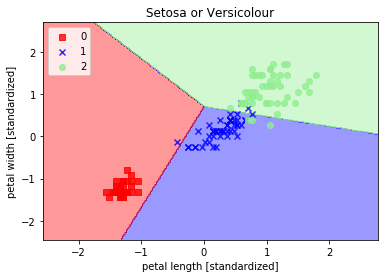

In [22]:
#写経【２０】
# 散布図上に決定曲線を出力
plot_decision_regions(X_2, y_2, ppn_2)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.title('Setosa or Versicolour')
plt.show()

In [23]:
#写経【２１】
# 正答率を出力
print('train acc: %.3f' % ppn_2.score(X_2_train, y_2_train))
print('test acc: %.3f' % ppn_2.score(X_2_test, y_2_test))

train acc: 0.952
test acc: 0.978


In [24]:
#写経【２２】
# testデータのindexを指定
# 0 <= index <= 44
index = 35

# 正解と予測のクラスラベルを出力
print('answer : %d' % y_2_test[index])
print('predict: %d' % ppn_2.predict(X_2_test[index].reshape(1, -1)))

answer : 1
predict: 1
